# P2 清洗与分析数据

## 收集数据

### 01 以编程方式下载推特图像的预测数据

In [1]:
import requests
import os
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 给定的 url
image_predictions_url = 'https://raw.githubusercontent.com/udacity/new-dand-advanced-china/master/%E6%95%B0%E6%8D%AE%E6%B8%85%E6%B4%97/WeRateDogs%E9%A1%B9%E7%9B%AE/image-predictions.tsv'

response = requests.get(image_predictions_url)
with open('image_predictions.tsv', mode = 'wb') as file:
    file.write(response.content)

In [3]:
image = pd.read_csv('image_predictions.tsv', sep = '\t', encoding = 'utf-8')
image

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


### 02 手头文件 收集 WeRateDogs 的推特档案

In [4]:
archive = pd.read_csv('twitter-archive-enhanced.csv', encoding = 'utf-8')

In [5]:
archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


### 03 通过 API 构建文件：每条推特的额外附加数据

In [6]:
# 不会使用 API 下载，借助论坛帖子，直接获取了数据。（占个坑，晚点探索 API 构建文件） 。论坛帖子 https://discussions.youdaxue.com/t/tweepy-api/57499/2 ；数据下载来源 https://github.com/udacity/new-dand-advanced-china/blob/master/%E6%95%B0%E6%8D%AE%E6%B8%85%E6%B4%97/WeRateDogs%E9%A1%B9%E7%9B%AE/tweet_json.txt

tweet = pd.DataFrame(columns = ['tweet_id', 
                             'favorites', 
                             'retweets'])
with open('tweet_json.txt') as json_file:
    for line in json_file:
        t = json.loads(line)
        tweet = tweet.append({
            'tweet_id': t['id'],
            'favorites': t['favorite_count'],
            'retweets': t['retweet_count']
        }, ignore_index = True)


In [7]:
tweet

,tweet_id,favorites,retweets
0,892420643555336193,39492,8842
1,892177421306343426,33786,6480
2,891815181378084864,25445,4301
3,891689557279858688,42863,8925
4,891327558926688256,41016,9721
5,891087950875897856,20548,3240
6,890971913173991426,12053,2142
7,890729181411237888,66596,19548
8,890609185150312448,28187,4403
9,890240255349198849,32467,7684


## 评估

收集上述三个数据集之后，使用目测评估和编程评估的方式，对数据进行质量和清洁度的评估。在你的 `wrangle_act.ipynb` Jupyter Notebook 中记录评估过程和结果，最终列出至少**8 个质量问题 和 2 个清洁度问题**。要符合项目规范，必须对项目动机中的要求进行评估（参见上一页课程的 关键要点 标题）

In [8]:
archive.sample(40)


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1829,676237365392908289,NaN,NaN,2015-12-14 03:08:46 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Winston. He has no respect for th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/676237365...,8,10,Winston,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None
1847,675820929667219457,NaN,NaN,2015-12-12 23:34:00 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a handful of sleepy puppers. All look u...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675820929...,11,10,None,None,None,None,None
1401,699434518667751424,NaN,NaN,2016-02-16 03:25:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I know this is a tad late but here's a wonderf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/699434518...,12,10,None,None,None,pupper,None
13,889638837579907072,NaN,NaN,2017-07-25 00:10:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Ted. He does his best. Sometimes that'...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889638837...,12,10,Ted,None,None,None,None
383,827199976799354881,NaN,NaN,2017-02-02 17:00:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Charlie. He wins every game of chess h...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/827199976...,13,10,Charlie,None,None,None,None
1940,673716320723169284,6.737159e+17,4.196984e+09,2015-12-07 04:11:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The millennials have spoken and we've decided ...,NaN,NaN,NaN,NaN,1,10,None,None,None,None,None
310,835309094223372289,NaN,NaN,2017-02-25 02:03:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: So this just changed my life. 1...,7.530398e+17,4.196984e+09,2016-07-13 01:34:21 +0000,"https://vine.co/v/5W2Dg3XPX7a,https://vine.co/...",13,10,None,None,None,None,None
1283,708711088997666817,NaN,NaN,2016-03-12 17:47:45 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Smokey. He really likes tennis balls. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/708711088...,11,10,Smokey,None,None,None,None
186,856288084350160898,8.562860e+17,2.792810e+08,2017-04-23 23:26:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@xianmcguire @Jenna_Marbles Kardashians wouldn...,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None


In [9]:
archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [10]:
archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [11]:
archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [12]:
archive.head()


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [13]:
archive.sample(20)


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
267,841680585030541313,NaN,NaN,2017-03-14 16:01:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Penny. She's a dragon slayer. Feared b...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/841680585...,12,10,Penny,None,None,None,None
952,751937170840121344,NaN,NaN,2016-07-10 00:32:46 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Ruby. Her ice cube is melting. She doe...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/751937170...,11,10,Ruby,None,None,None,None
2282,667211855547486208,NaN,NaN,2015-11-19 05:24:37 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Genevieve. She is a golden retriever c...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667211855...,9,10,Genevieve,None,None,None,None
2231,668226093875376128,NaN,NaN,2015-11-22 00:34:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Sneaky dog here. Tuba player has no clue. 10/1...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668226093...,10,10,None,None,None,None,None
72,878604707211726852,NaN,NaN,2017-06-24 13:24:20 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Martha is stunning how h*ckin dare you. 13/10 ...,NaN,NaN,NaN,https://twitter.com/bbcworld/status/8785998685...,13,10,None,None,None,None,None
1818,676593408224403456,NaN,NaN,2015-12-15 02:43:33 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This pupper loves leaves. 11/10 for committed ...,NaN,NaN,NaN,https://vine.co/v/eEQQaPFbgOY,11,10,None,None,None,pupper,None
1217,714962719905021952,NaN,NaN,2016-03-29 23:49:30 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",Just in case anyone's having a bad day. 12/10 ...,NaN,NaN,NaN,https://vine.co/v/inVtemLt9tE,12,10,None,None,None,None,None
507,812709060537683968,NaN,NaN,2016-12-24 17:18:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Brandi and Harley. They are practicing...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/812709060...,12,10,Brandi,None,None,None,None
2326,666411507551481857,NaN,NaN,2015-11-17 00:24:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is quite the dog. Gets really excited whe...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666411507...,2,10,quite,None,None,None,None
1383,700847567345688576,NaN,NaN,2016-02-20 01:00:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Crouton. He's a Galapagos Boonwiddle. Has...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/700847567...,10,10,Crouton,None,None,None,None


In [14]:
archive.name.value_counts()

# 745 name 为 None，55 name 为 a

None          745
a              55
Charlie        12
Oliver         11
Lucy           11
Cooper         11
Penny          10
Lola           10
Tucker         10
Winston         9
Bo              9
Sadie           8
the             8
Buddy           7
Bailey          7
Toby            7
Daisy           7
an              7
Scout           6
Milo            6
Jax             6
Rusty           6
Stanley         6
Leo             6
Dave            6
Oscar           6
Koda            6
Jack            6
Bella           6
Sammy           5
             ... 
Ivar            1
Saydee          1
Damon           1
Callie          1
Combo           1
Brady           1
Staniel         1
Brandy          1
Beya            1
Chef            1
Caryl           1
Lillie          1
BeBe            1
Philippe        1
Bones           1
Mike            1
Stuart          1
Acro            1
Jazzy           1
Dot             1
Storkson        1
Iggy            1
Tupawc          1
incredibly      1
Rooney    

In [15]:
archive[archive.name == 'a']


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
56,881536004380872706,NaN,NaN,2017-07-02 15:32:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a pupper approaching maximum borkdrive...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881536004...,14,10,a,None,None,pupper,None
649,792913359805018113,NaN,NaN,2016-10-31 02:17:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a perfect example of someone who has t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/792913359...,13,10,a,None,None,None,None
801,772581559778025472,NaN,NaN,2016-09-04 23:46:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Guys this is getting so out of hand. We only r...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/772581559...,10,10,a,None,None,None,None
1002,747885874273214464,NaN,NaN,2016-06-28 20:14:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a mighty rare blue-tailed hammer sherk...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/747885874...,8,10,a,None,None,None,None
1004,747816857231626240,NaN,NaN,2016-06-28 15:40:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Viewer discretion is advised. This is a terrib...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/747816857...,4,10,a,None,None,None,None
1017,746872823977771008,NaN,NaN,2016-06-26 01:08:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a carrot. We only rate dogs. Please on...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/746872823...,11,10,a,None,None,None,None
1049,743222593470234624,NaN,NaN,2016-06-15 23:24:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a very rare Great Alaskan Bush Pupper....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/743222593...,12,10,a,None,None,pupper,None
1193,717537687239008257,NaN,NaN,2016-04-06 02:21:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",People please. This is a Deadly Mediterranean ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/717537687...,11,10,a,None,None,None,None
1207,715733265223708672,NaN,NaN,2016-04-01 02:51:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a taco. We only rate dogs. Please only...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/715733265...,10,10,a,None,None,None,None
1340,704859558691414016,NaN,NaN,2016-03-02 02:43:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a heartbreaking scene of an incredible...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/704859558...,10,10,a,None,None,pupper,None


In [16]:
archive.name.value_counts()

None          745
a              55
Charlie        12
Oliver         11
Lucy           11
Cooper         11
Penny          10
Lola           10
Tucker         10
Winston         9
Bo              9
Sadie           8
the             8
Buddy           7
Bailey          7
Toby            7
Daisy           7
an              7
Scout           6
Milo            6
Jax             6
Rusty           6
Stanley         6
Leo             6
Dave            6
Oscar           6
Koda            6
Jack            6
Bella           6
Sammy           5
             ... 
Ivar            1
Saydee          1
Damon           1
Callie          1
Combo           1
Brady           1
Staniel         1
Brandy          1
Beya            1
Chef            1
Caryl           1
Lillie          1
BeBe            1
Philippe        1
Bones           1
Mike            1
Stuart          1
Acro            1
Jazzy           1
Dot             1
Storkson        1
Iggy            1
Tupawc          1
incredibly      1
Rooney    

In [17]:
image


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [18]:
image.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [19]:
image.jpg_url.value_counts()


https://pbs.twimg.com/tweet_video_thumb/CeBym7oXEAEWbEg.jpg                                2
https://pbs.twimg.com/media/DA7iHL5U0AA1OQo.jpg                                            2
https://pbs.twimg.com/media/CsrjryzWgAAZY00.jpg                                            2
https://pbs.twimg.com/media/CtzKC7zXEAALfSo.jpg                                            2
https://pbs.twimg.com/media/CiyHLocU4AI2pJu.jpg                                            2
https://pbs.twimg.com/media/Cq9guJ5WgAADfpF.jpg                                            2
https://pbs.twimg.com/media/C12whDoVEAALRxa.jpg                                            2
https://pbs.twimg.com/media/CwJR1okWIAA6XMp.jpg                                            2
https://pbs.twimg.com/media/C4KHj-nWQAA3poV.jpg                                            2
https://pbs.twimg.com/media/CdHwZd0VIAA4792.jpg                                            2
https://pbs.twimg.com/media/CU1zsMSUAAAS0qW.jpg                       

In [20]:
image[image.jpg_url == 'https://pbs.twimg.com/media/CV_cnjHWUAADc-c.jpg']

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
487,675501075957489664,https://pbs.twimg.com/media/CV_cnjHWUAADc-c.jpg,1,dough,0.806757,False,bakery,0.027907,False,French_loaf,0.018189,False
1592,798673117451325440,https://pbs.twimg.com/media/CV_cnjHWUAADc-c.jpg,1,dough,0.806757,False,bakery,0.027907,False,French_loaf,0.018189,False


In [21]:
tweet


,tweet_id,favorites,retweets
0,892420643555336193,39492,8842
1,892177421306343426,33786,6480
2,891815181378084864,25445,4301
3,891689557279858688,42863,8925
4,891327558926688256,41016,9721
5,891087950875897856,20548,3240
6,890971913173991426,12053,2142
7,890729181411237888,66596,19548
8,890609185150312448,28187,4403
9,890240255349198849,32467,7684


In [22]:
tweet.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2352 entries, 0 to 2351
Data columns (total 3 columns):
tweet_id     2352 non-null object
favorites    2352 non-null object
retweets     2352 non-null object
dtypes: object(3)
memory usage: 55.2+ KB


In [23]:
tweet.tweet_id.value_counts()

667495797102141441    1
746757706116112384    1
732375214819057664    1
676897532954456065    1
838201503651401729    1
708130923141795840    1
736392552031657984    1
752519690950500352    1
759943073749200896    1
741303864243200000    1
870656317836468226    1
710296729921429505    1
743835915802583040    1
756275833623502848    1
768909767477751808    1
745314880350101504    1
757597904299253760    1
751830394383790080    1
749075273010798592    1
746507379341139972    1
739544079319588864    1
712097430750289920    1
692901601640583168    1
714141408463036416    1
725729321944506368    1
733828123016450049    1
715928423106027520    1
760539183865880579    1
704347321748819968    1
718971898235854848    1
                     ..
694925794720792577    1
682638830361513985    1
710588934686908417    1
708810915978854401    1
832769181346996225    1
666437273139982337    1
667724302356258817    1
710844581445812225    1
676191832485810177    1
827228250799742977    1
6663962473732915

In [24]:
tweet.head()


,tweet_id,favorites,retweets
0,892420643555336193,39492,8842
1,892177421306343426,33786,6480
2,891815181378084864,25445,4301
3,891689557279858688,42863,8925
4,891327558926688256,41016,9721


### 质量

1. `archive` 表中，in_reply_to_status_id、in_reply_to_user_id、retweeted_status_id、retweeted_status_user_id、retweeted_status_timestamp 缺失数据
2. `archive` 表中，timestamp 列有 +0000，多余
3. `archive` 表中，source 列数据意义不大
4. `archive` 表中，745 条记录的名字为 None，55 条记录的名字为 a，数据缺失
5. `image` 表中，tweet_id 应为字符串，而不是 int 整数
6. `image` 表中，部分 jpg_url 相同
7. `tweet` 表中，favorites、retweets 数据类型应为整数
8. `archive` 表中，rating_denominator、rating_numerator 列部分数值异常，甚至出现三位数、四位数

### 整洁度

1. 以 tweet_id 为准，合并三个表格（根据tidy data的第3项要求：观察单位按表格组织（即：一个种类的观察形成一个单独的表格），这个项目里用到的数据集的主要观察是“对狗狗照片进行评分”，根据这个观察主题，而3个表格的变量都是围绕“对狗狗照片进行评分”这个主题的，所以将3个表格里的相关变量合并到一个表格就更符合tidy data的第3项说明。）
2. `archive` 表中，doggo、floofer、pupper、puppo 四列需合并，因为 doggo、floofer、pupper、puppo 四列代表狗狗等级，属于同一变量，应集中在一列中

# 清洗

## 质量

### 1.  `archive` 表中，in_reply_to_status_id、in_reply_to_user_id、retweeted_status_id、retweeted_status_user_id、retweeted_status_timestamp 缺失数据

- 定义

由题目要求可知，与转发推文相关的数据应该删除。即删除 retweeted_status_id、retweeted_status_user_id、retweeted_status_timestamp 有数据的行列。in_reply_to_status_id、in_reply_to_user_id 列为回复的相关信息，在此次数据分析中帮助不大，因此删除。

- 代码

In [25]:
# copy
archive_clean = archive.copy()
image_clean = image.copy()
tweet_clean = tweet.copy()

In [26]:
# 删除列
archive_clean.drop(['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'],axis=1,inplace=True)


- 测试

In [27]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2356 non-null int64
timestamp             2356 non-null object
source                2356 non-null object
text                  2356 non-null object
expanded_urls         2297 non-null object
rating_numerator      2356 non-null int64
rating_denominator    2356 non-null int64
name                  2356 non-null object
doggo                 2356 non-null object
floofer               2356 non-null object
pupper                2356 non-null object
puppo                 2356 non-null object
dtypes: int64(3), object(9)
memory usage: 221.0+ KB


### 2.  `archive` 表中，timestamp 列有 +0000，多余

- 定义

使用`astype`把 timestamp 数据类型改为字符串，使用字符串分割删除 timestamp 后面的 `+0000`

- 代码

In [28]:
# 将 timestamp 数据类型改为字符串
archive_clean.timestamp = archive_clean.timestamp.astype('str')
# 使用字符串分割删除 timestamp 后面的 `+0000`
archive_clean.timestamp = archive_clean.timestamp.str[:-5]

- 测试

In [29]:
archive_clean.timestamp

0       2017-08-01 16:23:56 
1       2017-08-01 00:17:27 
2       2017-07-31 00:18:03 
3       2017-07-30 15:58:51 
4       2017-07-29 16:00:24 
5       2017-07-29 00:08:17 
6       2017-07-28 16:27:12 
7       2017-07-28 00:22:40 
8       2017-07-27 16:25:51 
9       2017-07-26 15:59:51 
10      2017-07-26 00:31:25 
11      2017-07-25 16:11:53 
12      2017-07-25 01:55:32 
13      2017-07-25 00:10:02 
14      2017-07-24 17:02:04 
15      2017-07-24 00:19:32 
16      2017-07-23 00:22:39 
17      2017-07-22 16:56:37 
18      2017-07-22 00:23:06 
19      2017-07-21 01:02:36 
20      2017-07-20 16:49:33 
21      2017-07-19 16:06:48 
22      2017-07-19 03:39:09 
23      2017-07-19 00:47:34 
24      2017-07-18 16:08:03 
25      2017-07-18 00:07:08 
26      2017-07-17 16:17:36 
27      2017-07-16 23:58:41 
28      2017-07-16 20:14:00 
29      2017-07-15 23:25:31 
                ...         
2326    2015-11-17 00:24:19 
2327    2015-11-17 00:06:54 
2328    2015-11-16 23:23:41 
2329    2015-1

### 3. `archive` 表中，source 列数据意义不大

- 定义

source 列在此次数据分析中无用，因此删掉

- 代码

In [30]:
archive_clean = archive_clean.drop('source', axis = 1)

- 测试

In [31]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id              2356 non-null int64
timestamp             2356 non-null object
text                  2356 non-null object
expanded_urls         2297 non-null object
rating_numerator      2356 non-null int64
rating_denominator    2356 non-null int64
name                  2356 non-null object
doggo                 2356 non-null object
floofer               2356 non-null object
pupper                2356 non-null object
puppo                 2356 non-null object
dtypes: int64(3), object(8)
memory usage: 202.5+ KB


### 4. `archive` 表中，745 条记录的名字为 None，55 条记录的名字为 a

- 定义

使用正则表达式从 text 列中提取狗狗的名字，用 nan 代替名字缺失项。

- 代码

In [32]:
# 查看 archive 表的 name 列

archive_clean.name.value_counts()

# 除了出现 None、a 的值，还有 the、an 等明显名字不不正确的项

None          745
a              55
Charlie        12
Oliver         11
Lucy           11
Cooper         11
Penny          10
Lola           10
Tucker         10
Winston         9
Bo              9
Sadie           8
the             8
Buddy           7
Bailey          7
Toby            7
Daisy           7
an              7
Scout           6
Milo            6
Jax             6
Rusty           6
Stanley         6
Leo             6
Dave            6
Oscar           6
Koda            6
Jack            6
Bella           6
Sammy           5
             ... 
Ivar            1
Saydee          1
Damon           1
Callie          1
Combo           1
Brady           1
Staniel         1
Brandy          1
Beya            1
Chef            1
Caryl           1
Lillie          1
BeBe            1
Philippe        1
Bones           1
Mike            1
Stuart          1
Acro            1
Jazzy           1
Dot             1
Storkson        1
Iggy            1
Tupawc          1
incredibly      1
Rooney    

In [33]:
# 观察 text 列
archive_clean.text.value_counts()

This is Penny. She's both pupset and fired pup. Not pleased w your barbaric attempts at cleanliness. 12/10 would enjoy more shampoo options https://t.co/OYdDlfOGXP      1
We only rate dogs. Please don't send in other things like this very good Christmas tree. Thank you... 13/10 https://t.co/rvSANEsQZJ                                      1
RT @dog_rates: This is Carl. He's very powerful. 12/10 don't mess with Carl https://t.co/v5m2bIukXc                                                                      1
This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS                                         1
This is Dash. He didn't think the water would be that cold. Damn it Dash it's December. Think a little. 10/10 https://t.co/NqcOwG8pxW                                    1
This is Gary. He's a hide and seek champion. Second only to Kony. 8/10 Gary has a gift https://t.co/cAlB4XCcsi                                   

In [34]:
# 观察 name 值为 a 的数据

archive_clean.text[archive_clean.name == 'a'].value_counts()



This is a Speckled Cauliflower Yosemite named Hemry. He's terrified of intruder dog. Not one bit comfortable. 9/10 https://t.co/yV3Qgjh8iN                     1
This is a Deciduous Trimester mix named Spork. Only 1 ear works. No seat belt. Incredibly reckless. 9/10 still cute https://t.co/CtuJoLHiDo                    1
This is a wild Toblerone from Papua New Guinea. Mouth always open. Addicted to hay. Acts blind. 7/10 handsome dog https://t.co/IGmVbz07tZ                      1
This is a Lofted Aphrodisiac Terrier named Kip. Big fan of bed n breakfasts. Fits perfectly. 10/10 would pet firmly https://t.co/gKlLpNzIl3                    1
This is a baby Rand Paul. Curls for days. 11/10 would cuddle the hell out of https://t.co/xHXNaPAYRe                                                           1
This is a Wild Tuscan Poofwiggle. Careful not to startle. Rare tongue slip. One eye magical. 12/10 would def pet https://t.co/4EnShAQjv6                       1
Here is a mother dog caring for he

In [35]:
archive_clean.text[archive_clean.name == 'None'].value_counts()


IT'S SO SMALL ERMERGERF 11/10 https://t.co/dNUbKOSiWW                                                                                                                   1
Here's a helicopter pupper. He takes off at random. H*ckin hard to control. 12/10 rare af https://t.co/GRWPgNKt2z                                                       1
oh h*ck 10/10 https://t.co/bC69RrW559                                                                                                                                   1
Very fit horned dog here. Looks powerful. Not phased by wind. Great beard. Big enough to ride? 6/10 would cuddle https://t.co/wwwYO9C9kl                                1
We normally don't rate marshmallows but this one appears to be flawlessly toasted so I'll make an exception. 10/10 https://t.co/D9jbbmPmos                              1
When someone yells "cops!" at a party and you gotta get your drunk friend out of there. 10/10 https://t.co/4rMZi5Ca1k                                 

In [36]:
archive_clean.text[archive_clean.name == 'the'].value_counts()

This is the happiest pupper I've ever seen. 10/10 would trade lives with https://t.co/ep8ATEJwRb                                                    1
Never forget this vine. You will not stop watching for at least 15 minutes. This is the second coveted.. 13/10 https://t.co/roqIxCvEB3              1
Stop sending in lobsters. This is the final warning. We only rate dogs. Thank you... 9/10 https://t.co/B9ZXXKJYNx                                   1
This is the saddest/sweetest/best picture I've been sent. 12/10 😢🐶 https://t.co/vQ2Lw1BLBF                                                          1
Here is the Rand Paul of retrievers folks! He's probably good at poker. Can drink beer (lol rad). 8/10 good dog https://t.co/pYAJkAe76p             1
This is the best thing I've ever seen so spread it like wildfire &amp; maybe we'll find the genius who created it. 13/10 https://t.co/q6RsuOVYwU    1
This is the happiest dog you will ever see. Very committed owner. Nice couch. 10/10 https://t.co/RhU

In [37]:
archive_clean.text[archive_clean.name == 'an'].value_counts()



This is an East African Chalupa Seal. We only rate dogs. Please only send in dogs. Thank you... 10/10 https://t.co/iHe6liLwWR                   1
This is an extremely rare horned Parthenon. Not amused. Wears shoes. Overall very nice. 9/10 would pet aggressively https://t.co/QpRjllzWAL     1
RT @dog_rates: This is an East African Chalupa Seal. We only rate dogs. Please only send in dogs. Thank you... 10/10 https://t.co/iHe6liLwWR    1
This is an Albanian 3 1/2 legged  Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv        1
This is an odd dog. Hard on the outside but loving on the inside. Petting still fun. Doesn't play catch well. 2/10 https://t.co/v5A4vzSDdc      1
This is an Iraqi Speed Kangaroo. It is not a dog. Please only send in dogs. I'm very angry with all of you ...9/10 https://t.co/5qpBTTpgUt      1
This is an Irish Rigatoni terrier named Berta. Completely made of rope. No eyes. Quite large. Loves to dance. 10/10 https://

In [38]:
# name 出现在 Meet|This is|Say hello to|named|Here we have a|His name is 后
# name 前为空格，后为 . 或 空格
# name 首字母为大写
# 所以采用正则表达式 '(?:Meet|This is|Say hello to|named|Here we have a|His name is)\s+([A-Z][a-z]+)'
# \代表或，[A-Z][a-z]表示大写字母后紧跟小写字母

archive_clean['name_new'] = archive_clean.text.str.extract('(?:Meet|This is|Say hello to|named|Here we have a|His name is)\s+([A-Z][a-z]+)', expand = True)



- 测试

In [39]:
archive_clean['name_new'].value_counts()

Charlie     12
Lucy        11
Cooper      11
Oliver      11
Penny       10
Lola        10
Tucker      10
Winston      9
Bo           9
Sadie        8
Toby         7
Daisy        7
Buddy        7
Bailey       7
Koda         6
Milo         6
Rusty        6
Jax          6
Jack         6
Stanley      6
Leo          6
Scout        6
Oscar        6
Bella        6
Gus          5
Louis        5
Chester      5
Oakley       5
Larry        5
Bentley      5
            ..
Saydee       1
Karma        1
Damon        1
Callie       1
Jazz         1
Strider      1
Staniel      1
Jersey       1
Acro         1
Brandy       1
Chef         1
Caryl        1
Lillie       1
Philippe     1
Olaf         1
Bones        1
Mike         1
Stuart       1
Beya         1
Dot          1
Jazzy        1
Storkson     1
Iggy         1
Tupawc       1
Rooney       1
Gin          1
Alfy         1
Mookie       1
Kendall      1
Tuco         1
Name: name_new, Length: 952, dtype: int64

In [40]:
# 删除原来的 name 列

archive_clean = archive_clean.drop('name', axis = 1)

In [41]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id              2356 non-null int64
timestamp             2356 non-null object
text                  2356 non-null object
expanded_urls         2297 non-null object
rating_numerator      2356 non-null int64
rating_denominator    2356 non-null int64
doggo                 2356 non-null object
floofer               2356 non-null object
pupper                2356 non-null object
puppo                 2356 non-null object
name_new              1525 non-null object
dtypes: int64(3), object(8)
memory usage: 202.5+ KB


### 5. `image` 表中，tweet_id 应为字符串，而不是 int 整数

- 定义

将 tweet_id 的数据类型修改为字符串

- 代码

In [42]:
image_clean.tweet_id = image_clean.tweet_id.astype('str')

- 测试

In [43]:
image_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


### 6. `image` 表中，部分 jpg_url 相同

- 定义：删除重复的 url

- 代码：

In [44]:
image_clean.drop_duplicates(['jpg_url'], 'first', inplace = True)

- 测试

In [45]:
image_clean.jpg_url.value_counts()

https://pbs.twimg.com/media/CzpyM41UoAE1b2w.jpg                1
https://pbs.twimg.com/media/CXLREjOW8AElfk6.jpg                1
https://pbs.twimg.com/media/C0jcmOKVQAAd0VR.jpg                1
https://pbs.twimg.com/media/CUi5M7TXIAAY0gj.jpg                1
https://pbs.twimg.com/media/CV0_BSuWIAIvE9k.jpg                1
https://pbs.twimg.com/media/C3ODWpfXAAAP1fb.jpg                1
https://pbs.twimg.com/media/Cb2cfd9WAAEL-zk.jpg                1
https://pbs.twimg.com/media/CVquIDRW4AEJrPk.jpg                1
https://pbs.twimg.com/media/CW7bkW6WQAAksgB.jpg                1
https://pbs.twimg.com/media/CnhXzpvW8AAQ1MB.jpg                1
https://pbs.twimg.com/media/Cq_Vy9KWcAIUIuv.jpg                1
https://pbs.twimg.com/media/Co36VZfWcAEN3R3.jpg                1
https://pbs.twimg.com/media/CXKxkseW8AAjAMY.jpg                1
https://pbs.twimg.com/media/C74kWqoU8AEaf3v.jpg                1
https://pbs.twimg.com/media/CtX2Kr9XYAAuxrM.jpg                1
https://pbs.twimg.com/med

### 7. `tweet` 表中，favorites、retweets 数据类型应为整数

- 定义：将 favorites、retweets 数据类型改为整数，而不是字符串

- 代码

In [46]:
tweet_clean.favorites = tweet_clean.favorites.astype('int')
tweet_clean.retweets = tweet_clean.retweets.astype('int')

In [47]:
tweet_clean.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2352 entries, 0 to 2351
Data columns (total 3 columns):
tweet_id     2352 non-null object
favorites    2352 non-null int64
retweets     2352 non-null int64
dtypes: int64(2), object(1)
memory usage: 55.2+ KB


In [48]:
tweet_clean.head()

,tweet_id,favorites,retweets
0,892420643555336193,39492,8842
1,892177421306343426,33786,6480
2,891815181378084864,25445,4301
3,891689557279858688,42863,8925
4,891327558926688256,41016,9721


### 8. `archive` 表中，rating_denominator、rating_numerator 列部分数值异常，甚至出现三位数、四位数

- 定义：

利用正则表达式从 text 中提取分数，修正异常值，将原评分数据删掉

- 代码：

In [49]:
# 提取评分，利用正则表达式 \d+\.?\d*\/\d+ 匹配

archive_clean['rating_number'] = archive_clean.text.str.extract('(\d+\.?\d*\/\d+)',expand=True)

In [50]:
# 查看提取后的结果

archive_clean['rating_number'].value_counts()

12/10       558
11/10       463
10/10       461
13/10       351
9/10        156
8/10        102
14/10        54
7/10         53
5/10         35
6/10         32
3/10         19
4/10         15
2/10          9
1/10          8
4/20          2
9.75/10       2
15/10         2
9/11          2
420/10        2
0/10          2
13.5/10       1
45/50         1
666/10        1
960/00        1
7/11          1
11.26/10      1
007/10        1
182/10        1
24/7          1
80/80         1
11/15         1
204/170       1
11.27/10      1
17/10         1
143/130       1
84/70         1
88/80         1
1/2           1
9.5/10        1
165/150       1
121/110       1
60/50         1
1776/10       1
44/40         1
99/90         1
20/16         1
144/120       1
50/50         1
Name: rating_number, dtype: int64

In [51]:
# 将异常值列筛选出来，参考 [pandas中根据列的值选取多行数据 - htbeker的博客 - CSDN博客](https://blog.csdn.net/htbeker/article/details/80332360 )

archive_clean.loc[archive_clean['rating_number'].isin(['9/11', '4/20', '420/10','0/10', '50/50', '960/00','007/10', '80/80', '99/90', '20/16', '24/7', '143/130', '204/170', '88/80', '17/10', '11/15', '45/50', '1776/10','7/11', '1/2', '121/110', '666/10', '165/150', '44/40', '60/50', '182/10', '84/70', '144/120'])].text.value_counts()


Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv                                                    1
The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd                                                                          1
This is an Albanian 3 1/2 legged  Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv                                     1
After so many requests... here you go.\n\nGood dogg. 420/10 https://t.co/yfAAo1gdeY                                                                                          1
When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag                                                            1
Here we have an entire platoon of puppers. Total score: 88/80 would pet all at once https://t.co/y93p6FLvVw                  

In [52]:
# 打开原始数据，一一查看每行数据完整的 text，处理方式分类如下

# 没有错误：666/10, 1776/10,182/10 ，420/10，0/10，420/10
# 需要换算成分母为 10 的：121/110，60/50,144/120,80/80,99/90,165/150,45/50, 88/80，20/16，204/170，4/20，143/130，44/40，84/70
# 提取错误：50/50-11/10 ,7/11-10/10, 1/2-9/10, 24/7-nan， 960/00-13/10，007/10-7/10，9/11-14/10， 4/20-13/10， 17/10-13/10， 11/15-nan

archive_clean['rating_number'].replace({'121/110':'11/10','60/50':'12/10','144/120':'12/10','80/80':'10/10','99/90':'11/10', '165/150':'11/10', '45/50':'9/10', '88/80':'11/10', '20/16':'12.5/10','204/170':'12/10', '4/20':'2/10', '143/130':'11/10', '44/40':'11/10','84/70':'11/10', '50/50':'11/10','7/11':'10/10', '1/2':'9/10', '24/7':'', '960/00':'13/10', '007/10':'7/10', '9/11':'14/10', '4/20':'13/10', '17/10':'13/10', '11/15':''},inplace=True)


In [53]:
archive_clean['rating_number'].value_counts()

12/10       561
11/10       471
10/10       463
13/10       355
9/10        158
8/10        102
14/10        56
7/10         54
5/10         35
6/10         32
3/10         19
4/10         15
2/10          9
1/10          8
0/10          2
9.75/10       2
              2
15/10         2
420/10        2
12.5/10       1
13.5/10       1
11.27/10      1
1776/10       1
666/10        1
11.26/10      1
182/10        1
9.5/10        1
Name: rating_number, dtype: int64

In [54]:
# 使用 str.split() 方法将分子和分母分开

archive_clean['rating_numerator_new'],archive_clean['rating_denominator_new'] = archive_clean['rating_number'].str.split('/', 1).str



In [55]:
archive_clean['rating_numerator_new'].value_counts()

12       561
11       471
10       463
13       355
9        158
8        102
14        56
7         54
5         35
6         32
3         19
4         15
2          9
1          8
           2
15         2
420        2
0          2
9.75       2
9.5        1
12.5       1
182        1
11.27      1
666        1
1776       1
11.26      1
13.5       1
Name: rating_numerator_new, dtype: int64

In [56]:
archive_clean['rating_denominator_new'].value_counts()

10    2354
Name: rating_denominator_new, dtype: int64

In [57]:
# 删除原评分列

archive_clean.drop(['rating_numerator','rating_denominator'], axis = 1, inplace = True)


In [58]:
# 只保留评分的一种表达方式，即以分子分母分开的方式，删除合并为一列的方式。

archive_clean.drop(['rating_number'], axis = 1, inplace = True)

- 测试

In [59]:
archive_clean.rating_numerator_new.value_counts()


12       561
11       471
10       463
13       355
9        158
8        102
14        56
7         54
5         35
6         32
3         19
4         15
2          9
1          8
           2
15         2
420        2
0          2
9.75       2
9.5        1
12.5       1
182        1
11.27      1
666        1
1776       1
11.26      1
13.5       1
Name: rating_numerator_new, dtype: int64

In [60]:
archive_clean.rating_denominator_new.value_counts()

10    2354
Name: rating_denominator_new, dtype: int64

In [61]:
archive_clean

,tweet_id,timestamp,text,expanded_urls,doggo,floofer,pupper,puppo,name_new,rating_numerator_new,rating_denominator_new
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,None,None,None,None,Phineas,13,10
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,None,None,None,None,Tilly,13,10
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,None,None,None,None,Archie,12,10
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,None,None,None,None,Darla,13,10
4,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,None,None,None,None,Franklin,12,10
5,891087950875897856,2017-07-29 00:08:17,Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,None,None,None,None,NaN,13,10
6,890971913173991426,2017-07-28 16:27:12,Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",None,None,None,None,Jax,13,10
7,890729181411237888,2017-07-28 00:22:40,When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,None,None,None,None,NaN,13,10
8,890609185150312448,2017-07-27 16:25:51,This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,None,None,None,None,Zoey,13,10
9,890240255349198849,2017-07-26 15:59:51,This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,doggo,None,None,None,Cassie,14,10


## 整洁度问题

### 1. 以 tweet_id 为准，合并三个表格（根据tidy data的第3项要求：观察单位按表格组织（即：一个种类的观察形成一个单独的表格），这个项目里用到的数据集的主要观察是“对狗狗照片进行评分”，根据这个观察主题，而3个表格的变量都是围绕“对狗狗照片进行评分”这个主题的，所以将3个表格里的相关变量合并到一个表格就更符合tidy data的第3项说明。）

- 定义：

以 tweet_id 为准，使用 merge() 合并三个表格为 df_clean

- 代码：

In [62]:
# 将 archive_clean 的 tweet_id 数据类型修改为字符串，统一三个表 tweet_id 的数据类型
# archive_clean.tweet_id = archive_clean.tweet_id.astype('str')
# df1_clean = pd.merge(archive_clean, image_clean, on = 'tweet_id', how = 'left')
# df_clean = pd.merge(df1_clean, tweet_clean, on = 'tweet_id', how = 'left')
# 结果发现 favorites、retweets 的值为 0，从论坛找到答案（[项目二：为什么使用merge函数合并dataframe返回NaN](https://discussions.youdaxue.com/t/merge-dataframe-nan/54186)），尝试先将 tweet_id 全部变为整数，合并后再变为字符串

image_clean.tweet_id = image_clean.tweet_id.astype('int')
tweet_clean.tweet_id = tweet_clean.tweet_id.astype('int')
df1_clean = pd.merge(archive_clean, image_clean, on = 'tweet_id', how = 'inner')
df_clean = pd.merge(df1_clean, tweet_clean, on = 'tweet_id', how = 'inner')

In [63]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2009 entries, 0 to 2008
Data columns (total 24 columns):
tweet_id                  2009 non-null int64
timestamp                 2009 non-null object
text                      2009 non-null object
expanded_urls             2009 non-null object
doggo                     2009 non-null object
floofer                   2009 non-null object
pupper                    2009 non-null object
puppo                     2009 non-null object
name_new                  1371 non-null object
rating_numerator_new      2009 non-null object
rating_denominator_new    2008 non-null object
jpg_url                   2009 non-null object
img_num                   2009 non-null int64
p1                        2009 non-null object
p1_conf                   2009 non-null float64
p1_dog                    2009 non-null bool
p2                        2009 non-null object
p2_conf                   2009 non-null float64
p2_dog                    2009 non-null bool
p3  

In [64]:
# 再把 tweet_id 的数据类型改为字符串

df_clean.tweet_id = df_clean.tweet_id.astype('str')

- 测试

In [65]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2009 entries, 0 to 2008
Data columns (total 24 columns):
tweet_id                  2009 non-null object
timestamp                 2009 non-null object
text                      2009 non-null object
expanded_urls             2009 non-null object
doggo                     2009 non-null object
floofer                   2009 non-null object
pupper                    2009 non-null object
puppo                     2009 non-null object
name_new                  1371 non-null object
rating_numerator_new      2009 non-null object
rating_denominator_new    2008 non-null object
jpg_url                   2009 non-null object
img_num                   2009 non-null int64
p1                        2009 non-null object
p1_conf                   2009 non-null float64
p1_dog                    2009 non-null bool
p2                        2009 non-null object
p2_conf                   2009 non-null float64
p2_dog                    2009 non-null bool
p3 

### 2. `archive` 表中，doggo、floofer、pupper、puppo 四列需合并，因为 doggo、floofer、pupper、puppo 四列代表狗狗等级，属于同一变量，应集中在一列中

- 定义：

合并 doggo、floofer、pupper、puppo 四列

- 代码

In [66]:
df_clean = pd.melt(df_clean, id_vars=['tweet_id','timestamp', 'text','expanded_urls','name_new', 'rating_numerator_new','rating_denominator_new',
                                     'jpg_url','img_num','p1','p1_conf','p1_dog','p2','p2_conf','p2_dog','p3','p3_conf','p3_dog',
                                     'favorites','retweets'],
                   value_vars=['doggo','floofer','pupper','puppo'],
                   value_name='stage')


In [67]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8036 entries, 0 to 8035
Data columns (total 22 columns):
tweet_id                  8036 non-null object
timestamp                 8036 non-null object
text                      8036 non-null object
expanded_urls             8036 non-null object
name_new                  5484 non-null object
rating_numerator_new      8036 non-null object
rating_denominator_new    8032 non-null object
jpg_url                   8036 non-null object
img_num                   8036 non-null int64
p1                        8036 non-null object
p1_conf                   8036 non-null float64
p1_dog                    8036 non-null bool
p2                        8036 non-null object
p2_conf                   8036 non-null float64
p2_dog                    8036 non-null bool
p3                        8036 non-null object
p3_conf                   8036 non-null float64
p3_dog                    8036 non-null bool
favorites                 8036 non-null int64
retwe

In [68]:
df_clean.sample(20)

,tweet_id,timestamp,text,expanded_urls,name_new,rating_numerator_new,rating_denominator_new,jpg_url,img_num,p1,...,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorites,retweets,variable,stage
8024,666071193221509120,2015-11-16 01:52:02,Here we have a northern speckled Rhododendron....,https://twitter.com/dog_rates/status/666071193...,NaN,9,10,https://pbs.twimg.com/media/CT5cN_3WEAAlOoZ.jpg,1,Gordon_setter,...,Yorkshire_terrier,0.174201,True,Pekinese,0.109454,True,154,67,puppo,None
1278,686618349602762752,2016-01-11 18:39:05,This is Olivia. She just saw an adult wearing ...,https://twitter.com/dog_rates/status/686618349...,Olivia,11,10,https://pbs.twimg.com/media/CYdbvwjWcAEtjYu.jpg,1,Rottweiler,...,miniature_pinscher,0.233180,True,Gordon_setter,0.093582,True,4023,1533,doggo,None
6107,873580283840344065,2017-06-10 16:39:04,We usually don't rate Deck-bound Saskatoon Bla...,https://twitter.com/dog_rates/status/873580283...,NaN,13,10,https://pbs.twimg.com/media/DB-UotKXkAEHXVi.jpg,1,Newfoundland,...,Tibetan_mastiff,0.244022,True,chow,0.048530,True,24757,4110,puppo,None
4318,826476773533745153,2017-01-31 17:06:32,This is Pilot. He has mastered the synchronize...,https://twitter.com/dog_rates/status/826476773...,Pilot,12,10,https://pbs.twimg.com/media/C3g8M0lWIAEcFgn.jpg,1,German_shepherd,...,Tibetan_mastiff,0.122812,True,kelpie,0.100460,True,20201,4801,pupper,None
3062,705239209544720384,2016-03-03 03:51:44,This is Jimothy. He lost his body during the t...,https://twitter.com/dog_rates/status/705239209...,Jimothy,11,10,https://pbs.twimg.com/media/CcmDUjFW8AAqAjc.jpg,1,Chihuahua,...,toy_terrier,0.089920,True,Mexican_hairless,0.063225,True,3271,848,floofer,None
3746,670823764196741120,2015-11-29 04:37:03,This is Remington. He's a man dime. 12/10 http...,https://twitter.com/dog_rates/status/670823764...,Remington,12,10,https://pbs.twimg.com/media/CU8-puBWwAAR8Xl.jpg,1,Labrador_retriever,...,German_short-haired_pointer,0.017001,True,Weimaraner,0.015432,True,820,204,floofer,None
5578,674690135443775488,2015-12-09 20:40:38,Meet Patrick. He's an exotic pup. Jumps great ...,https://twitter.com/dog_rates/status/674690135...,Patrick,3,10,https://pbs.twimg.com/media/CVz7FxXWUAAlTRP.jpg,1,tick,...,nail,0.212589,False,screw,0.172838,False,1233,507,pupper,None
3403,680161097740095489,2015-12-24 23:00:17,Meet Goliath. He's an example of irony. Head i...,https://twitter.com/dog_rates/status/680161097...,Goliath,12,10,https://pbs.twimg.com/media/CXBq6RPWkAAaNuU.jpg,1,bluetick,...,miniature_pinscher,0.125652,True,English_setter,0.089373,True,2527,823,floofer,None
7910,668248472370458624,2015-11-22 02:03:45,Say hello to Bisquick. He is a Brown Douglass ...,https://twitter.com/dog_rates/status/668248472...,Bisquick,8,10,https://pbs.twimg.com/media/CUYYcMfXAAAixe7.jpg,1,Chihuahua,...,miniature_pinscher,0.068294,True,toy_terrier,0.046367,True,1053,523,puppo,None
7325,685307451701334016,2016-01-08 03:50:03,Say hello to Petrick. He's an Altostratus Floo...,https://twitter.com/dog_rates/status/685307451...,Petrick,11,10,https://pbs.twimg.com/media/CYKzfTTWMAEeTN7.jpg,1,Pomeranian,...,Shetland_sheepdog,0.019468,True,keeshond,0.008605,True,2255,494,puppo,None


In [69]:
# 删除 variable 列

df_clean = df_clean.drop('variable', axis = 1)


In [70]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8036 entries, 0 to 8035
Data columns (total 21 columns):
tweet_id                  8036 non-null object
timestamp                 8036 non-null object
text                      8036 non-null object
expanded_urls             8036 non-null object
name_new                  5484 non-null object
rating_numerator_new      8036 non-null object
rating_denominator_new    8032 non-null object
jpg_url                   8036 non-null object
img_num                   8036 non-null int64
p1                        8036 non-null object
p1_conf                   8036 non-null float64
p1_dog                    8036 non-null bool
p2                        8036 non-null object
p2_conf                   8036 non-null float64
p2_dog                    8036 non-null bool
p3                        8036 non-null object
p3_conf                   8036 non-null float64
p3_dog                    8036 non-null bool
favorites                 8036 non-null int64
retwe

In [71]:
# 删除 stage 为 None 项

df_clean = df_clean[(df_clean.stage != 'None')]

- 测试

In [72]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 321 entries, 9 to 6852
Data columns (total 21 columns):
tweet_id                  321 non-null object
timestamp                 321 non-null object
text                      321 non-null object
expanded_urls             321 non-null object
name_new                  181 non-null object
rating_numerator_new      321 non-null object
rating_denominator_new    321 non-null object
jpg_url                   321 non-null object
img_num                   321 non-null int64
p1                        321 non-null object
p1_conf                   321 non-null float64
p1_dog                    321 non-null bool
p2                        321 non-null object
p2_conf                   321 non-null float64
p2_dog                    321 non-null bool
p3                        321 non-null object
p3_conf                   321 non-null float64
p3_dog                    321 non-null bool
favorites                 321 non-null int64
retweets                 

In [73]:
# 检查是否有重复 tweet_id

df_clean.tweet_id.value_counts()

733109485275860992    2
785639753186217984    2
808106460588765185    2
802265048156610565    2
741067306818797568    2
751583847268179968    2
854010172552949760    2
855851453814013952    2
817777686764523521    2
801115127852503040    2
759793422261743616    2
672594978741354496    1
687476254459715584    1
677269281705472000    1
707315916783140866    1
797971864723324932    1
679503373272485890    1
705428427625635840    1
688894073864884227    1
720340705894408192    1
752334515931054080    1
704347321748819968    1
727644517743104000    1
826958653328592898    1
889531135344209921    1
680145970311643136    1
728035342121635841    1
675845657354215424    1
732375214819057664    1
725786712245440512    1
                     ..
755206590534418437    1
850019790995546112    1
700143752053182464    1
755955933503782912    1
867421006826221569    1
782747134529531904    1
776477788987613185    1
800018252395122689    1
685547936038666240    1
672898206762672129    1
7681934045178306

In [74]:
# 删除重复的 tweet_id

df_clean.drop_duplicates('tweet_id',keep='first',inplace=True)
df_clean.tweet_id.value_counts()

749317047558017024    1
752334515931054080    1
728035342121635841    1
680145970311643136    1
677269281705472000    1
707315916783140866    1
797971864723324932    1
705428427625635840    1
720340705894408192    1
704347321748819968    1
685641971164143616    1
727644517743104000    1
826958653328592898    1
889531135344209921    1
790946055508652032    1
750011400160841729    1
680100725817409536    1
814986499976527872    1
675845657354215424    1
693590843962331137    1
708845821941387268    1
687096057537363968    1
687476254459715584    1
679503373272485890    1
675898130735476737    1
672594978741354496    1
688894073864884227    1
725786712245440512    1
751456908746354688    1
681891461017812993    1
                     ..
867421006826221569    1
782747134529531904    1
776477788987613185    1
800018252395122689    1
685547936038666240    1
672898206762672129    1
768193404517830656    1
733109485275860992    1
740676976021798912    1
869596645499047938    1
7392381577916948

In [75]:
# 检查 stage 列

df_clean.stage.value_counts()

pupper     207
doggo       74
puppo       22
floofer      7
Name: stage, dtype: int64

In [76]:
# 保存清洗后的主数据集到 CSV

df_clean.to_csv('WeRateDogs_clean.csv', index=False)

## 分析和可视化

### 分析 01: 狗狗等级分布

In [77]:
df_clean
df_clean.info()

# 复制一份数据

df_analysis = df_clean.copy()
df_analysis

<class 'pandas.core.frame.DataFrame'>
Int64Index: 310 entries, 9 to 6852
Data columns (total 21 columns):
tweet_id                  310 non-null object
timestamp                 310 non-null object
text                      310 non-null object
expanded_urls             310 non-null object
name_new                  177 non-null object
rating_numerator_new      310 non-null object
rating_denominator_new    310 non-null object
jpg_url                   310 non-null object
img_num                   310 non-null int64
p1                        310 non-null object
p1_conf                   310 non-null float64
p1_dog                    310 non-null bool
p2                        310 non-null object
p2_conf                   310 non-null float64
p2_dog                    310 non-null bool
p3                        310 non-null object
p3_conf                   310 non-null float64
p3_dog                    310 non-null bool
favorites                 310 non-null int64
retweets                 

,tweet_id,timestamp,text,expanded_urls,name_new,rating_numerator_new,rating_denominator_new,jpg_url,img_num,p1,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorites,retweets,stage
9,890240255349198849,2017-07-26 15:59:51,This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,Cassie,14,10,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,1,Pembroke,...,True,Cardigan,0.451038,True,Chihuahua,0.029248,True,32467,7684,doggo
37,884162670584377345,2017-07-09 21:29:42,Meet Yogi. He doesn't have any important dog m...,https://twitter.com/dog_rates/status/884162670...,Yogi,12,10,https://pbs.twimg.com/media/DEUtQbzW0AUTv_o.jpg,1,German_shepherd,...,True,malinois,0.199396,True,Norwegian_elkhound,0.049148,True,20719,3099,doggo
82,872967104147763200,2017-06-09 00:02:31,Here's a very large dog. He has a date later. ...,https://twitter.com/dog_rates/status/872967104...,NaN,12,10,https://pbs.twimg.com/media/DB1m871XUAAw5vZ.jpg,2,Labrador_retriever,...,True,Chesapeake_Bay_retriever,0.174145,True,German_short-haired_pointer,0.092861,True,27918,5632,doggo
90,871515927908634625,2017-06-04 23:56:03,This is Napolean. He's a Raggedy East Nicaragu...,https://twitter.com/dog_rates/status/871515927...,Napolean,12,10,https://pbs.twimg.com/media/DBg_HT9WAAEeIMM.jpg,2,komondor,...,True,briard,0.020041,True,swab,0.003228,False,20687,3608,doggo
99,869596645499047938,2017-05-30 16:49:31,This is Scout. He just graduated. Officially a...,https://twitter.com/dog_rates/status/869596645...,Scout,12,10,https://pbs.twimg.com/media/DBFtiYqWAAAsjj1.jpg,1,Chihuahua,...,True,toy_terrier,0.008054,True,muzzle,0.006296,False,16431,3300,doggo
140,858843525470990336,2017-05-01 00:40:27,I have stumbled puppon a doggo painting party....,https://twitter.com/dog_rates/status/858843525...,NaN,13,10,https://pbs.twimg.com/media/C-s5oYZXkAAMHHq.jpg,1,golden_retriever,...,True,Labrador_retriever,0.286059,True,bloodhound,0.026917,True,16242,3746,doggo
151,855851453814013952,2017-04-22 18:31:02,Here's a puppo participating in the #ScienceMa...,https://twitter.com/dog_rates/status/855851453...,NaN,13,10,https://pbs.twimg.com/media/C-CYWrvWAAU8AXH.jpg,1,flat-coated_retriever,...,True,Labrador_retriever,0.115138,True,groenendael,0.096100,True,47679,19118,doggo
157,854010172552949760,2017-04-17 16:34:26,"At first I thought this was a shy doggo, but i...",https://twitter.com/dog_rates/status/854010172...,NaN,11,10,https://pbs.twimg.com/media/C9oNt91WAAAFSLS.jpg,1,English_springer,...,True,collie,0.177538,True,Border_collie,0.131706,True,17120,3419,doggo
190,846514051647705089,2017-03-28 00:07:32,This is Barney. He's an elder doggo. Hitches a...,https://twitter.com/dog_rates/status/846514051...,Barney,13,10,https://pbs.twimg.com/media/C79sB4xXwAEvwKY.jpg,2,golden_retriever,...,True,Leonberg,0.065199,True,Norfolk_terrier,0.052955,True,48198,12992,doggo
195,845397057150107648,2017-03-24 22:08:59,Say hello to Mimosa. She's an emotional suppor...,"https://www.gofundme.com/help-save-a-pup,https...",Mimosa,13,10,https://pbs.twimg.com/media/C7t0IzLWkAINoft.jpg,1,Dandie_Dinmont,...,True,Maltese_dog,0.186537,True,West_Highland_white_terrier,0.181985,True,8215,2056,doggo


In [78]:
# 分析 01: 狗狗等级分布

df_analysis.stage.value_counts()


pupper     207
doggo       74
puppo       22
floofer      7
Name: stage, dtype: int64

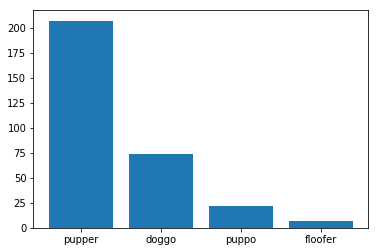

In [79]:
data = [207, 74, 22, 7]
labels = ['pupper', 'doggo', 'puppo', 'floofer']

plt.bar(range(len(data)), data, tick_label=labels)
plt.show()

# 从图中可知，pupper 等级的狗狗数量最多，floofer 等级的狗狗数量最少

### 分析 02：点赞最高的狗狗

In [80]:
# 应用 .sort_values() 函数排序
df_analysis.sort_values(by="favorites", ascending=False, inplace=True)
df_analysis.head(5)
# 点赞最高的狗狗是下图这只 super supportive puppo，获得 132318

,tweet_id,timestamp,text,expanded_urls,name_new,rating_numerator_new,rating_denominator_new,jpg_url,img_num,p1,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorites,retweets,stage
6345,822872901745569793,2017-01-21 18:26:02,Here's a super supportive puppo participating ...,https://twitter.com/dog_rates/status/822872901...,NaN,13,10,https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg,1,Lakeland_terrier,...,True,Labrador_retriever,0.160329,True,Irish_terrier,0.069126,True,132318,47958,puppo
787,744234799360020481,2016-06-18 18:26:18,Here's a doggo realizing you can stand in a po...,https://twitter.com/dog_rates/status/744234799...,NaN,13,10,https://pbs.twimg.com/ext_tw_video_thumb/74423...,1,Labrador_retriever,...,True,ice_bear,0.044681,False,whippet,0.018442,True,130533,79116,doggo
4128,866450705531457537,2017-05-22 00:28:40,This is Jamesy. He gives a kiss to every other...,https://twitter.com/dog_rates/status/866450705...,Jamesy,13,10,https://pbs.twimg.com/media/DAZAUfBXcAAG_Nn.jpg,2,French_bulldog,...,True,Boston_bull,0.078060,True,pug,0.001771,True,106481,32705,pupper
342,819004803107983360,2017-01-11 02:15:36,This is Bo. He was a very good First Doggo. 14...,https://twitter.com/dog_rates/status/819004803...,Bo,14,10,https://pbs.twimg.com/media/C12whDoVEAALRxa.jpg,1,standard_poodle,...,True,toy_poodle,0.271929,True,Tibetan_terrier,0.094759,True,95138,42045,doggo
822,739238157791694849,2016-06-04 23:31:25,Here's a doggo blowing bubbles. It's downright...,https://twitter.com/dog_rates/status/739238157...,NaN,13,10,https://pbs.twimg.com/ext_tw_video_thumb/73923...,1,Eskimo_dog,...,True,Siberian_husky,0.390413,True,malamute,0.080901,True,74885,52101,doggo


### 分析 03:哪种级别的狗狗最受欢迎

In [81]:
# 分析 03:哪种级别的狗狗最受欢迎

df_stage = df_analysis[df_analysis.stage.notnull()][['stage', 'favorites', 'retweets']]
df_stage


,stage,favorites,retweets
6345,puppo,132318,47958
787,doggo,130533,79116
4128,pupper,106481,32705
342,doggo,95138,42045
822,doggo,74885,52101
6333,puppo,56199,19563
459,doggo,55479,27586
4067,pupper,50326,16564
341,doggo,49786,21699
190,doggo,48198,12992


In [82]:
# 按照等级计算 favorites 和 retweets 的平均值

favorite_stage = df_stage.groupby(['stage']).mean()
favorite_stage = favorite_stage.sort_values(by='favorites',ascending=False)
favorite_stage

# 最受欢迎的狗狗级别是 puppo，平均点赞量为 21505.68，最不受欢迎的狗狗级别是 pupper，平均点赞量为 7037.49    


,favorites,retweets
stage,,
puppo,21505.681818,6434.818182
doggo,18811.675676,6833.243243
floofer,13156.857143,4935.000000
pupper,7037.487923,2310.811594


AxesSubplot(0.125,0.125;0.775x0.755)


Text(0.5,1,'The favourites and retweets counts of different stage dogs')

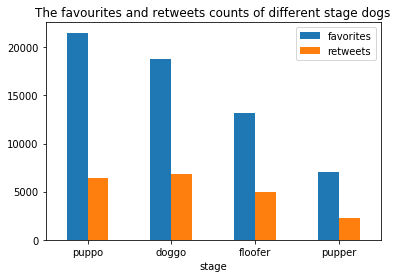

In [83]:
# 可视化

print(favorite_stage.plot.bar(rot=0))
plt.title(u'The favourites and retweets counts of different stage dogs') 

## 参考资料

- [清洗和分析WeRateDogs推特数据 - 知乎](https://zhuanlan.zhihu.com/p/46390727)
- [WerateDogs数据分析 - weixin_43830241的博客 - CSDN博客](https://blog.csdn.net/weixin_43830241/article/details/85131615)
- [怎样使用tweepy（api)? - DAND 数据分析 / DAND - 清洗与分析数据 - 优达学城论坛](https://discussions.youdaxue.com/t/tweepy-api/57499)
- [项目二：为什么使用merge函数合并dataframe返回NaN - DAND 数据分析 / DAND - 清洗与分析数据 - 优达学城论坛](https://discussions.youdaxue.com/t/merge-dataframe-nan/54186)
- [pandas.DataFrame.sort_values — pandas 0.24.2 documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html#pandas.DataFrame.sort_values)
- [pandas.DataFrame.plot.bar — pandas 0.24.2 documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.bar.html?highlight=bar#pandas.DataFrame.plot.bar)
- [pandas.DataFrame.to_csv — pandas 0.24.2 documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_csv.html)
- [pandas中根据列的值选取多行数据 - htbeker的博客 - CSDN博客](https://blog.csdn.net/htbeker/article/details/80332360)

## CHANGELOG 

- 190416 清理 3.0
- 190326 清理 2.0
- 190325 清理 1.0
- 190227 评估
- 190226 收集